<div style="text-align: left; background-color:#CFD9F1; font-family: Trebuchet MS; color:#0C779F; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">🚢 TITANIC 🚢</div>
<div style="text-align: left; background-color:#DDD8F6; font-family: Monaco; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">🌎 
The most notorious shipwreck in history 🌎</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>
    
## <div style="text-align: left; background-color:#CFD9F1; font-family: Trebuchet MS; color: #0C779F; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">TABLE OF CONTENTS📝</div>
       
* [1. Objectives of Notebook](#1)
    
* [2. Import Libraries](#2)
    
* [3. Read Dataset](#3)
     
* [4. Discovering Data](#4)
    
* [5. Preprocessing Data](#5)
    - [5.1. Training Data](#5.1)
    - [5.2. Testing Data](#5.2)
    
* [6. Data visualization](#6)   
    
* [7. Hand-made Classification by DecisionTree Model](#7)
    
* [8. Test Accuracy and Submit](#8)
    
* [9. Authors Message](#9)

<a id="1"></a>
## <div style="text-align: left; background-color:#F0CFEA ; font-family: Trebuchet MS; color:#891034; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">1. Objectives of Notebook 📌</div> 

✅<div style="border-radius:10px;
            border :#0A0104 solid;
            padding: 15px;
            background-color:#DDD8F6;
            font-size:110%;
            text-align: left">
    
- Pre-process data, prepare clean data for predictive model
    
- 📊Visualize data, give insight
    
- 🔎Use machine learning to create a model that predicts which passengers will survive the sinking of the Titanic

<a id="2"></a>
## <div style="text-align: left; background-color:#F0CFEA ; font-family: Trebuchet MS; color:#891034; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">2. Import Libraries 📚</div> 

In [1]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

<a id="3"></a>
## <div style="text-align: left; background-color:#F0CFEA; font-family: Trebuchet MS; color:#891034; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">3. Read Dataset 📝</div> 

In [2]:
def read_dataset():
    train = pd.read_csv("../input/titanic/train.csv")
    print('Train data imported successfully!')
    test = pd.read_csv("../input/titanic/test.csv")
    print('Test data imported successfully!')
    return train, test

In [3]:
train, test=read_dataset()

Train data imported successfully!
Test data imported successfully!


<a id="4"></a>
## <div style="text-align: left; background-color:#F0CFEA; font-family: Trebuchet MS; color:#891034; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">4. Discovering Data 🔎</div> 

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Info of train data:")
print(train.info())

Info of train data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

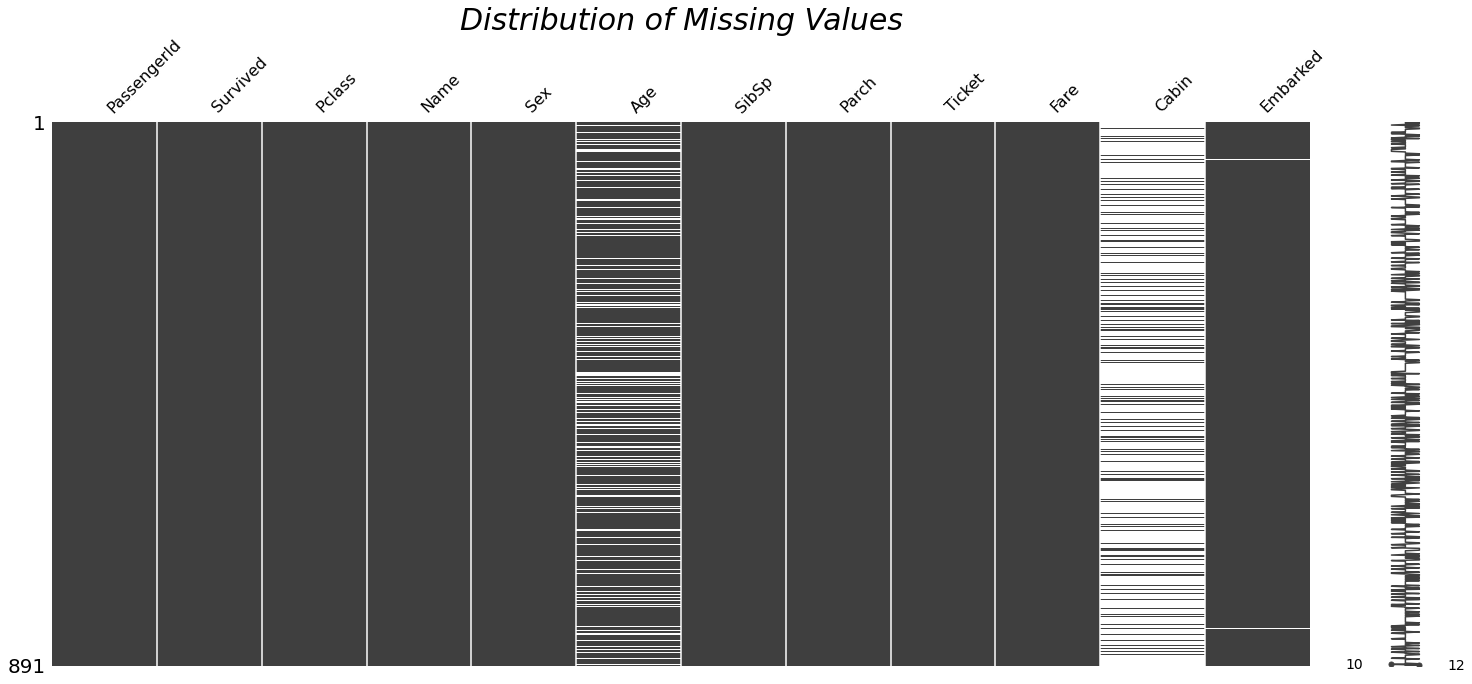

In [7]:
msno.matrix(train)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

<a id="5"></a>
## <div style="text-align: left; background-color:#F0CFEA; font-family: Trebuchet MS; color:#891034; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">5. Preprocessing Data 🛠</div>

<a id="5.1"></a>
### <div style="text-align: left; background-color:#DEF5B9; font-family:Trebuchet MS;color:#1D3E06; padding: 14px; line-height: 1;border-radius:10px">5.1 Training Data</div>

<h3 style="color:#0D8D39 ;font-size: 25px "><b> Delete attributes that have no value

In [8]:
train.drop(["PassengerId","Cabin","Ticket","Name"], inplace=True, axis=1)

<h3 style="color:#0D8D39 ;font-size: 25px "><b> Separate input and target

In [9]:
train_inputs=train.drop('Survived',axis=1)
train_targets=train['Survived']

<h3 style="color:#0D8D39 ;font-size: 25px "><b> Identify the numeric and categorical columns.

In [10]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [64]:
categorical_cols

['Sex', 'Embarked']

<h3 style="color:#0D8D39 ;font-size: 25px "><b> Imputing missing numeric values

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
imputer=SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [66]:
train_inputs[numeric_cols]

KeyError: "['SibSp', 'Parch'] not in index"

In [13]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])

There are only 2 null values ​​in Embarked. So I'll fill it with the most frequently occurring value.

**👉 There are only 2 null values ​​in Embarked. So I'll fill it with the most frequently occurring value.**

In [14]:
train_inputs['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

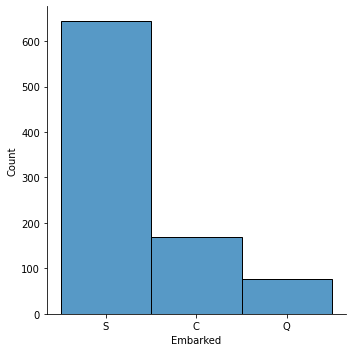

In [15]:
sns.displot(train['Embarked'])
plt.show()

**👉 Most passengers start from embarked S**

In [16]:
train_inputs['Embarked']=train_inputs['Embarked'].fillna('S')

<h3 style="color:#0D8D39 ;font-size: 25px "><b> Encoding Categorical Data

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [19]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [20]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

In [21]:
train_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,male,22.000000,1.0,0.0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1.0,female,38.000000,1.0,0.0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,3.0,female,26.000000,0.0,0.0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1.0,female,35.000000,1.0,0.0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,3.0,male,35.000000,0.0,0.0,8.0500,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,male,27.000000,0.0,0.0,13.0000,S,0.0,1.0,0.0,0.0,1.0
887,1.0,female,19.000000,0.0,0.0,30.0000,S,1.0,0.0,0.0,0.0,1.0
888,3.0,female,29.699118,1.0,2.0,23.4500,S,1.0,0.0,0.0,0.0,1.0
889,1.0,male,26.000000,0.0,0.0,30.0000,C,0.0,1.0,1.0,0.0,0.0


<h3 style="color:#0D8D39 ;font-size: 25px "><b> Drop the textual categorical columns

In [22]:
gender=pd.get_dummies(train_inputs['Sex'],drop_first=True)
train_inputs['Gender']=gender
train_inputs['Gender']=train_inputs['Gender'].astype('float64')
train_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Gender
0,3.0,male,22.000000,1.0,0.0,7.2500,S,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,female,38.000000,1.0,0.0,71.2833,C,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,female,26.000000,0.0,0.0,7.9250,S,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,female,35.000000,1.0,0.0,53.1000,S,1.0,0.0,0.0,0.0,1.0,0.0
4,3.0,male,35.000000,0.0,0.0,8.0500,S,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,male,27.000000,0.0,0.0,13.0000,S,0.0,1.0,0.0,0.0,1.0,1.0
887,1.0,female,19.000000,0.0,0.0,30.0000,S,1.0,0.0,0.0,0.0,1.0,0.0
888,3.0,female,29.699118,1.0,2.0,23.4500,S,1.0,0.0,0.0,0.0,1.0,0.0
889,1.0,male,26.000000,0.0,0.0,30.0000,C,0.0,1.0,1.0,0.0,0.0,1.0


<h3 style="color:#0D8D39 ;font-size: 25px "><b> Label encoder

In [23]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Embarked'.
train_inputs['Embarked']= label_encoder.fit_transform(train_inputs['Embarked'])
train_inputs['Embarked']=train_inputs['Embarked'].astype('float64')
train_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Gender
0,3.0,male,22.000000,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,female,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,female,26.000000,0.0,0.0,7.9250,2.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,female,35.000000,1.0,0.0,53.1000,2.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3.0,male,35.000000,0.0,0.0,8.0500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,male,27.000000,0.0,0.0,13.0000,2.0,0.0,1.0,0.0,0.0,1.0,1.0
887,1.0,female,19.000000,0.0,0.0,30.0000,2.0,1.0,0.0,0.0,0.0,1.0,0.0
888,3.0,female,29.699118,1.0,2.0,23.4500,2.0,1.0,0.0,0.0,0.0,1.0,0.0
889,1.0,male,26.000000,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0,0.0,1.0


<h3 style="color:#0D8D39 ;font-size: 25px "><b>Drop the textual categorical columns

In [24]:
train_inputs.drop(['Sex'],inplace=True,axis=1)

In [25]:
train_inputs

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Gender
0,3.0,22.000000,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,2.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,35.000000,1.0,0.0,53.1000,2.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3.0,35.000000,0.0,0.0,8.0500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,2.0,0.0,1.0,0.0,0.0,1.0,1.0
887,1.0,19.000000,0.0,0.0,30.0000,2.0,1.0,0.0,0.0,0.0,1.0,0.0
888,3.0,29.699118,1.0,2.0,23.4500,2.0,1.0,0.0,0.0,0.0,1.0,0.0
889,1.0,26.000000,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [26]:
train_inputs.dtypes

Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Embarked      float64
Sex_female    float64
Sex_male      float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
Gender        float64
dtype: object

In [27]:
train_inputs.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Gender        0
dtype: int64

In [28]:
train_inputs.drop(['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'],inplace=True,axis=1)
train_inputs

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3.0,22.000000,1.0,0.0,7.2500,2.0,1.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,2.0,0.0
3,1.0,35.000000,1.0,0.0,53.1000,2.0,0.0
4,3.0,35.000000,0.0,0.0,8.0500,2.0,1.0
...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,2.0,1.0
887,1.0,19.000000,0.0,0.0,30.0000,2.0,0.0
888,3.0,29.699118,1.0,2.0,23.4500,2.0,0.0
889,1.0,26.000000,0.0,0.0,30.0000,0.0,1.0


In [29]:
train_inputs['Family_Mems']=train_inputs['SibSp']+train_inputs['Parch']
train_inputs.drop(['SibSp','Parch'],inplace=True,axis=1)
train_inputs

,Pclass,Age,Fare,Embarked,Gender,Family_Mems
0,3.0,22.000000,7.2500,2.0,1.0,1.0
1,1.0,38.000000,71.2833,0.0,0.0,1.0
2,3.0,26.000000,7.9250,2.0,0.0,0.0
3,1.0,35.000000,53.1000,2.0,0.0,1.0
4,3.0,35.000000,8.0500,2.0,1.0,0.0
...,...,...,...,...,...,...
886,2.0,27.000000,13.0000,2.0,1.0,0.0
887,1.0,19.000000,30.0000,2.0,0.0,0.0
888,3.0,29.699118,23.4500,2.0,0.0,3.0
889,1.0,26.000000,30.0000,0.0,1.0,0.0


In [30]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    float64
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   Embarked     891 non-null    float64
 4   Gender       891 non-null    float64
 5   Family_Mems  891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [31]:
X=train_inputs.copy()
X

,Pclass,Age,Fare,Embarked,Gender,Family_Mems
0,3.0,22.000000,7.2500,2.0,1.0,1.0
1,1.0,38.000000,71.2833,0.0,0.0,1.0
2,3.0,26.000000,7.9250,2.0,0.0,0.0
3,1.0,35.000000,53.1000,2.0,0.0,1.0
4,3.0,35.000000,8.0500,2.0,1.0,0.0
...,...,...,...,...,...,...
886,2.0,27.000000,13.0000,2.0,1.0,0.0
887,1.0,19.000000,30.0000,2.0,0.0,0.0
888,3.0,29.699118,23.4500,2.0,0.0,3.0
889,1.0,26.000000,30.0000,0.0,1.0,0.0


<h4 style="color:#0D8D39 ;font-size: 25px "><b> Converting from Pandas DataFrame to Numpy Array

In [32]:
X=X.to_numpy(dtype='float64')
X 

array([[ 3.        , 22.        ,  7.25      ,  2.        ,  1.        ,
         1.        ],
       [ 1.        , 38.        , 71.2833    ,  0.        ,  0.        ,
         1.        ],
       [ 3.        , 26.        ,  7.925     ,  2.        ,  0.        ,
         0.        ],
       ...,
       [ 3.        , 29.69911765, 23.45      ,  2.        ,  0.        ,
         3.        ],
       [ 1.        , 26.        , 30.        ,  0.        ,  1.        ,
         0.        ],
       [ 3.        , 32.        ,  7.75      ,  1.        ,  1.        ,
         0.        ]])

In [33]:
#Printing top 5 examples of X
print(X[:5,:])

[[ 3.     22.      7.25    2.      1.      1.    ]
 [ 1.     38.     71.2833  0.      0.      1.    ]
 [ 3.     26.      7.925   2.      0.      0.    ]
 [ 1.     35.     53.1     2.      0.      1.    ]
 [ 3.     35.      8.05    2.      1.      0.    ]]


<a id="5.2"></a>
### <div style="text-align: left; background-color:#DEF5B9; font-family:Trebuchet MS;color:#1D3E06; padding: 14px; line-height: 1;border-radius:10px">5.2 Testing Data</div>

In [34]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
test.drop(["PassengerId","Cabin","Ticket","Name"], inplace=True, axis=1)

In [36]:
test_inputs=test
test_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [37]:
numeric_cols_test = test_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols_test = test_inputs.select_dtypes('object').columns.tolist()

In [38]:
imputer2=SimpleImputer(strategy='mean').fit(test_inputs[numeric_cols_test])
test_inputs[numeric_cols_test]=imputer2.transform(test[numeric_cols_test])

In [39]:
test_inputs['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [40]:
test_inputs['Embarked']=test_inputs['Embarked'].fillna('S')

In [41]:
encoder2 = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(test_inputs[categorical_cols_test])
encoded_cols_test = list(encoder2.get_feature_names_out(categorical_cols_test))
test_inputs[encoded_cols_test] = encoder2.transform(test_inputs[categorical_cols_test])

In [42]:
test_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,male,34.50000,0.0,0.0,7.8292,Q,0.0,1.0,0.0,1.0,0.0
1,3.0,female,47.00000,1.0,0.0,7.0000,S,1.0,0.0,0.0,0.0,1.0
2,2.0,male,62.00000,0.0,0.0,9.6875,Q,0.0,1.0,0.0,1.0,0.0
3,3.0,male,27.00000,0.0,0.0,8.6625,S,0.0,1.0,0.0,0.0,1.0
4,3.0,female,22.00000,1.0,1.0,12.2875,S,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,male,30.27259,0.0,0.0,8.0500,S,0.0,1.0,0.0,0.0,1.0
414,1.0,female,39.00000,0.0,0.0,108.9000,C,1.0,0.0,1.0,0.0,0.0
415,3.0,male,38.50000,0.0,0.0,7.2500,S,0.0,1.0,0.0,0.0,1.0
416,3.0,male,30.27259,0.0,0.0,8.0500,S,0.0,1.0,0.0,0.0,1.0


In [43]:
gender2=pd.get_dummies(test_inputs['Sex'],drop_first=True)
test_inputs['Gender']=gender2
test_inputs['Gender']=test_inputs['Gender'].astype('float64')
test_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Gender
0,3.0,male,34.50000,0.0,0.0,7.8292,Q,0.0,1.0,0.0,1.0,0.0,1.0
1,3.0,female,47.00000,1.0,0.0,7.0000,S,1.0,0.0,0.0,0.0,1.0,0.0
2,2.0,male,62.00000,0.0,0.0,9.6875,Q,0.0,1.0,0.0,1.0,0.0,1.0
3,3.0,male,27.00000,0.0,0.0,8.6625,S,0.0,1.0,0.0,0.0,1.0,1.0
4,3.0,female,22.00000,1.0,1.0,12.2875,S,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,male,30.27259,0.0,0.0,8.0500,S,0.0,1.0,0.0,0.0,1.0,1.0
414,1.0,female,39.00000,0.0,0.0,108.9000,C,1.0,0.0,1.0,0.0,0.0,0.0
415,3.0,male,38.50000,0.0,0.0,7.2500,S,0.0,1.0,0.0,0.0,1.0,1.0
416,3.0,male,30.27259,0.0,0.0,8.0500,S,0.0,1.0,0.0,0.0,1.0,1.0


In [44]:
# Encode labels in column 'Embarked'.
test_inputs['Embarked']= label_encoder.fit_transform(test_inputs['Embarked'])
test_inputs['Embarked']=test_inputs['Embarked'].astype('float64')
test_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Gender
0,3.0,male,34.50000,0.0,0.0,7.8292,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,3.0,female,47.00000,1.0,0.0,7.0000,2.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.0,male,62.00000,0.0,0.0,9.6875,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,3.0,male,27.00000,0.0,0.0,8.6625,2.0,0.0,1.0,0.0,0.0,1.0,1.0
4,3.0,female,22.00000,1.0,1.0,12.2875,2.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,male,30.27259,0.0,0.0,8.0500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
414,1.0,female,39.00000,0.0,0.0,108.9000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
415,3.0,male,38.50000,0.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0,1.0
416,3.0,male,30.27259,0.0,0.0,8.0500,2.0,0.0,1.0,0.0,0.0,1.0,1.0


In [45]:
test_inputs.drop(['Sex'],inplace=True,axis=1)

In [46]:
test_inputs.drop(['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'],inplace=True,axis=1)
test_inputs

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3.0,34.50000,0.0,0.0,7.8292,1.0,1.0
1,3.0,47.00000,1.0,0.0,7.0000,2.0,0.0
2,2.0,62.00000,0.0,0.0,9.6875,1.0,1.0
3,3.0,27.00000,0.0,0.0,8.6625,2.0,1.0
4,3.0,22.00000,1.0,1.0,12.2875,2.0,0.0
...,...,...,...,...,...,...,...
413,3.0,30.27259,0.0,0.0,8.0500,2.0,1.0
414,1.0,39.00000,0.0,0.0,108.9000,0.0,0.0
415,3.0,38.50000,0.0,0.0,7.2500,2.0,1.0
416,3.0,30.27259,0.0,0.0,8.0500,2.0,1.0


In [47]:
test_inputs['Family_Mems']=test_inputs['SibSp']+test_inputs['Parch']
test_inputs.drop(['SibSp','Parch'],inplace=True,axis=1)
test_inputs

,Pclass,Age,Fare,Embarked,Gender,Family_Mems
0,3.0,34.50000,7.8292,1.0,1.0,0.0
1,3.0,47.00000,7.0000,2.0,0.0,1.0
2,2.0,62.00000,9.6875,1.0,1.0,0.0
3,3.0,27.00000,8.6625,2.0,1.0,0.0
4,3.0,22.00000,12.2875,2.0,0.0,2.0
...,...,...,...,...,...,...
413,3.0,30.27259,8.0500,2.0,1.0,0.0
414,1.0,39.00000,108.9000,0.0,0.0,0.0
415,3.0,38.50000,7.2500,2.0,1.0,0.0
416,3.0,30.27259,8.0500,2.0,1.0,0.0


In [48]:
X_test=test_inputs.copy()
X_test

,Pclass,Age,Fare,Embarked,Gender,Family_Mems
0,3.0,34.50000,7.8292,1.0,1.0,0.0
1,3.0,47.00000,7.0000,2.0,0.0,1.0
2,2.0,62.00000,9.6875,1.0,1.0,0.0
3,3.0,27.00000,8.6625,2.0,1.0,0.0
4,3.0,22.00000,12.2875,2.0,0.0,2.0
...,...,...,...,...,...,...
413,3.0,30.27259,8.0500,2.0,1.0,0.0
414,1.0,39.00000,108.9000,0.0,0.0,0.0
415,3.0,38.50000,7.2500,2.0,1.0,0.0
416,3.0,30.27259,8.0500,2.0,1.0,0.0


In [49]:
#Converting from Pandas DataFrame to Numpy Array
X_test=X_test.to_numpy(dtype='float64')
X_test 

array([[ 3.        , 34.5       ,  7.8292    ,  1.        ,  1.        ,
         0.        ],
       [ 3.        , 47.        ,  7.        ,  2.        ,  0.        ,
         1.        ],
       [ 2.        , 62.        ,  9.6875    ,  1.        ,  1.        ,
         0.        ],
       ...,
       [ 3.        , 38.5       ,  7.25      ,  2.        ,  1.        ,
         0.        ],
       [ 3.        , 30.27259036,  8.05      ,  2.        ,  1.        ,
         0.        ],
       [ 3.        , 30.27259036, 22.3583    ,  0.        ,  1.        ,
         2.        ]])

<a id="6"></a>
## <div style="text-align: left; background-color:#F0CFEA; font-family: Trebuchet MS; color:#891034; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">6. Visualizing the Data 📉</div>

In [50]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = plt.figure()

    for i in range(len(y)):
      if y[i]==1:
        plt.plot(X[i,0],X[i,1],'r*');
      else:
        plt.plot(X[i,0],X[i,1],'bo');
    

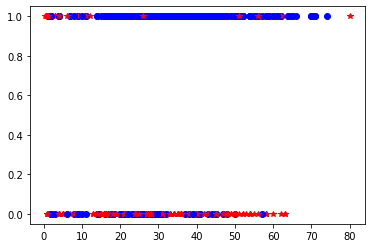

In [51]:
#Visualizing by age feature and gender feature
plotData(X[:,[1,4]],train_targets)

**👉From the graph we can see that the female survival rate is significantly higher than that of male. Females of almost all ages belong to the survivor class, which is quite consistent with the reality of female preference.**

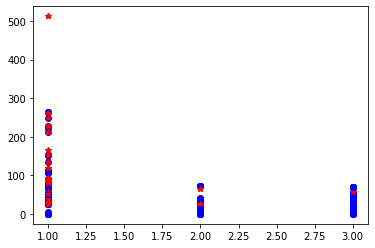

In [52]:
#Visualizing by Pcalss feature and Fare feature
plotData(X[:,[0,2]],train_targets)

The higher the fare and the more luxurious the ticket, the higher the survival rate

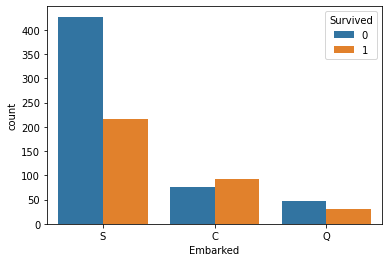

In [53]:
sns.countplot(data=train,x='Embarked',hue='Survived');

**👉The survival rate of those who depart from the port of Southampton is the highest and the mortality rate is similar.**

<a id="7"></a>
## <div style="text-align: left; background-color:#F0CFEA; font-family: Trebuchet MS; color:#891034; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">7. Hand-made Classification by DecisionTree Model 🤖</div>

<h3 style="color:#0D8D39 ;font-size: 25px "><b> Definition Class Node

In [54]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

<h3 style="color:#0D8D39 ;font-size: 25px "><b> Definition DecisionTree

In [55]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [56]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
y=train_targets.to_numpy().reshape(-1,1)
classifier.fit(X,y)
classifier.print_tree()

X_4 <= 0.0 ? 0.1396479574728524
 left:X_0 <= 2.0 ? 0.0992456441378125
  left:X_1 <= 2.0 ? 0.0047586093260834905
    left:0.0
    right:X_2 <= 28.7125 ? 0.004039209008153216
        left:1.0
        right:1.0
  right:X_2 <= 23.25 ? 0.06980056980056987
    left:X_1 <= 36.0 ? 0.02541731772500999
        left:1.0
        right:0.0
    right:X_5 <= 1.0 ? 0.060778727445394254
        left:1.0
        right:0.0
 right:X_1 <= 6.0 ? 0.01981221304625158
  left:X_5 <= 3.0 ? 0.37037037037037035
    left:1.0
    right:X_5 <= 5.0 ? 0.04938271604938271
        left:0.0
        right:0.0
  right:X_0 <= 1.0 ? 0.02004289592513342
    left:X_2 <= 26.0 ? 0.02334595959595953
        left:0.0
        right:0.0
    right:X_2 <= 46.9 ? 0.002978951743586422
        left:0.0
        right:0.0


<a id="8"></a>
## <div style="text-align: left; background-color:#F0CFEA; font-family: Trebuchet MS; color:#891034; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">8. Test Accuracy and Submit ✅</div>

In [57]:
y_test= pd.read_csv("../input/titanic/gender_submission.csv")
y_test=y_test['Survived'].to_numpy()

In [58]:
y_pred = classifier.predict(X_test)
y_pred=np.array(y_pred).astype('int')
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [59]:
print('Test Accuracy: %.1f %%' % (np.mean(y_pred == y_test) * 100))

Test Accuracy: 95.5 %


**👉 Test Accuracy:<mark>95.5 %</mark>.**

In [60]:
submission = pd.read_csv("../input/titanic/gender_submission.csv")

In [61]:
prediction=pd.DataFrame(y_pred,columns=['Survived'])
prediction

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [62]:
submission_last=pd.concat([submission[['PassengerId']],prediction],axis=1)

In [63]:
submission_last.to_csv('submission_last.csv',index=False)

<a id="9"></a>
## <div style="text-align: left; background-color:#F0CFEA; font-family: Trebuchet MS; color:#891034; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green">9. Authors Message 🙇</div>

<p style="background-color:#DEF5B9;font-family:newtimeroman;color:#1D3E06;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> ✨Best Wishes✨</p>